In [33]:
import numpy as np
import torch
from torch import nn
from PIL import Image
from torchvision.transforms import transforms
import numpy as np

In [4]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.sequential = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(start_dim=1),
            nn.Linear(in_features=64 * 4 * 4, out_features=10)
        )

    def forward(self, x):
        out = self.sequential(x)
        return out

In [6]:
###模型加载
net=Net()
net.load_state_dict(torch.load("hmy_net_model8.pth",map_location=torch.device('cpu')))

<All keys matched successfully>

In [35]:
print(img)

<PIL.Image.Image image mode=RGB size=800x1067 at 0x22DEEE57CD0>


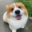

In [78]:
###图片加载
###先加载为PIL格式
img=Image.open('dog.jpg')
img=img.convert('RGB')

###图片转换
transform = transforms.Compose([    transforms.Resize(32),  # 短边缩放到32
    transforms.CenterCrop((32, 32))  # 裁剪到32x32
    ,transforms.ToTensor()])
img_tensor=transform(img)

####还原需要先乘以255
img_array=np.array(img_tensor)*255
###还原需要设置为uint8格式
img_array=img_array.astype('uint8')
###还原需要修改通道维度的位置
img_array=img_array.transpose((1,2,0))
###np.array图像表示
Image.fromarray(img_array)

In [76]:
img_array*255

array([[[178., 177., 173.],
        [179., 178., 174.],
        [177., 176., 172.],
        ...,
        [ 97., 122.,  61.],
        [104., 125.,  71.],
        [103., 127.,  63.]],

       [[170., 170., 163.],
        [169., 168., 164.],
        [172., 171., 167.],
        ...,
        [105., 131.,  65.],
        [118., 135.,  84.],
        [116., 130.,  79.]],

       [[165., 164., 156.],
        [162., 162., 155.],
        [163., 163., 157.],
        ...,
        [ 94., 125.,  56.],
        [115., 135.,  80.],
        [116., 129.,  74.]],

       ...,

       [[142., 140., 134.],
        [146., 143., 137.],
        [142., 139., 133.],
        ...,
        [ 84.,  84.,  69.],
        [ 85.,  87.,  73.],
        [ 82.,  85.,  70.]],

       [[142., 140., 134.],
        [143., 140., 134.],
        [145., 142., 136.],
        ...,
        [ 91.,  91.,  78.],
        [ 87.,  89.,  75.],
        [ 82.,  84.,  70.]],

       [[145., 144., 137.],
        [147., 144., 138.],
        [146., 1

In [70]:
to_pil

ToPILImage(mode=<PIL.Image.Image image mode=RGB size=32x32 at 0x22DEF21C0D0>)